<a href="https://colab.research.google.com/github/KanoonGammy/Applied_ML_HW/blob/main/Homework3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.2 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


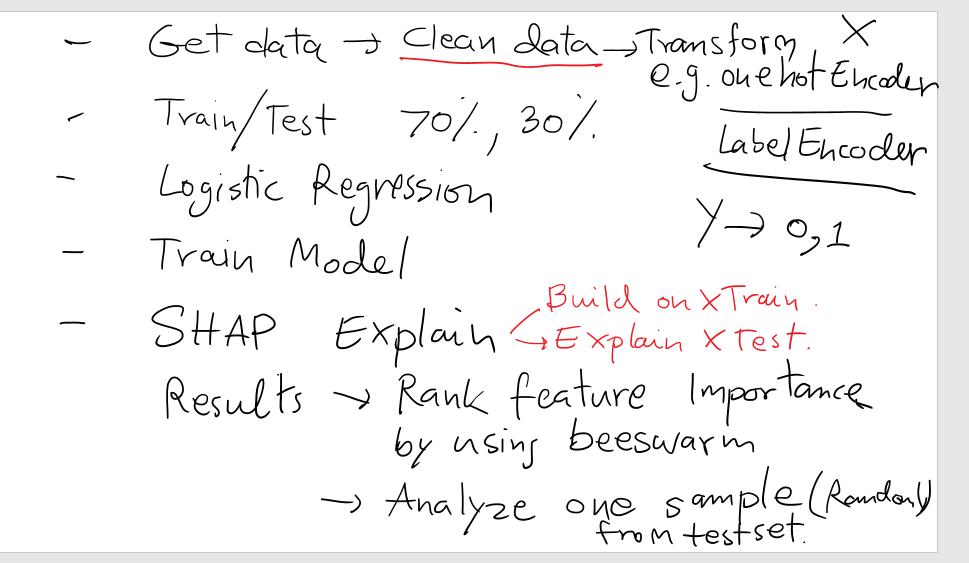

In [10]:
from sklearn import preprocessing
import numpy as np
import shap
import pandas as pd

In [169]:
data = pd.read_excel('/content/drive/MyDrive/DADS 6003 APPLIED MACHINE LEARNING/สำรวจการใช้ Smartphone.xlsx')
display(data.head())
display(data.info())

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,2024-01-13 14:41:24.845,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
1,2024-01-13 15:01:07.628,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
2,2024-01-13 15:01:43.854,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
3,2024-01-13 15:01:48.140,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน
4,2024-01-13 15:01:48.801,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Timestamp                                                        69 non-null     datetime64[ns]
 1   เพศของผู้ตอบแบบสอบถาม                                            69 non-null     object        
 2   ช่วงอายุของผู้ตอบแบบสอบถาม                                       69 non-null     object        
 3   อาชีพของผู้ตอบแบบสอบถาม                                          69 non-null     object        
 4   ช่วงเงินเดือนของผู้ตอบแบบสอบถาม                                  69 non-null     object        
 5   ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด                         69 non-null     object        
 6   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]                   69 non-null     obj

None

In [179]:
df = data.dropna().copy()
columns_drop = ['Timestamp','จากข้อที่แล้ว เนื่องจากสาเหตุใด']
df.drop(columns_drop,
          axis=1,
          inplace=True)
columns_keep = [col for col in df.columns if col != 'ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']

X = df[columns_keep]
y = df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']

In [180]:
enc_X = pd.get_dummies(X, X.columns)
(enc_X.head())
display(enc_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 45 columns):
 #   Column                                                                     Non-Null Count  Dtype
---  ------                                                                     --------------  -----
 0   เพศของผู้ตอบแบบสอบถาม_ชาย                                                  69 non-null     bool 
 1   เพศของผู้ตอบแบบสอบถาม_หญิง                                                 69 non-null     bool 
 2   ช่วงอายุของผู้ตอบแบบสอบถาม_21-25 ปี                                        69 non-null     bool 
 3   ช่วงอายุของผู้ตอบแบบสอบถาม_26-30 ปี                                        69 non-null     bool 
 4   ช่วงอายุของผู้ตอบแบบสอบถาม_31-35 ปี                                        69 non-null     bool 
 5   ช่วงอายุของผู้ตอบแบบสอบถาม_36-40 ปี                                        69 non-null     bool 
 6   อาชีพของผู้ตอบแบบสอบถาม_Freelancer                                         6

None

In [181]:
le = preprocessing.LabelEncoder()
le.fit(y.unique())
le_y = pd.DataFrame(le.transform(y) ,columns= [y.name])
# print(le.classes_)
# print(le.transform(y))
# print(le.inverse_transform(le.transform(y)))

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(enc_X, le_y, test_size=0.3, random_state=555)
LogistReg = LogisticRegression()
LogistReg.fit(X_train, y_train)
accuracy = LogistReg.score(X_test, y_test)

print(f"{accuracy=:.4f}")

accuracy=0.8095


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')

https://shap.readthedocs.io/en/stable/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.80      1.00      0.89        16

    accuracy                           0.81        21
   macro avg       0.90      0.60      0.61        21
weighted avg       0.85      0.81      0.76        21



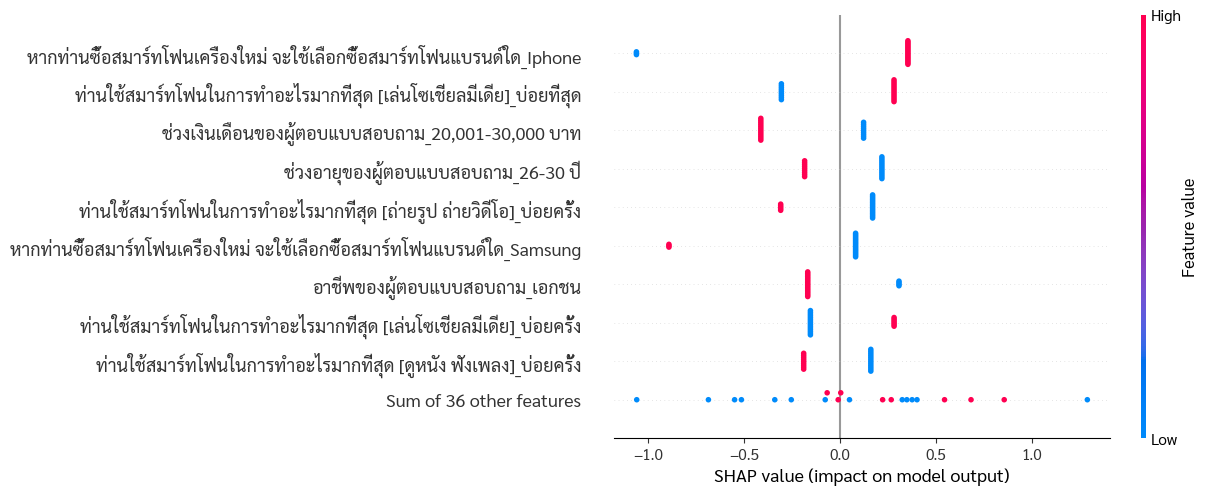

<module 'shap.plots' from '/usr/local/lib/python3.10/dist-packages/shap/plots/__init__.py'>

In [209]:
import shap
from sklearn.metrics import classification_report
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')
col_names = le_y.join(enc_X).columns

print(classification_report(y_test, LogistReg.predict(X_test)))

explainer = shap.Explainer(LogistReg, X_train, feature_names=col_names)
shap_values = explainer(X_test)


shap.plots.initjs()
shap.plots.beeswarm(shap_values)
shap.plots

In [211]:
ind = 0
shap.plots.initjs()
shap.plots.force(shap_values[ind])

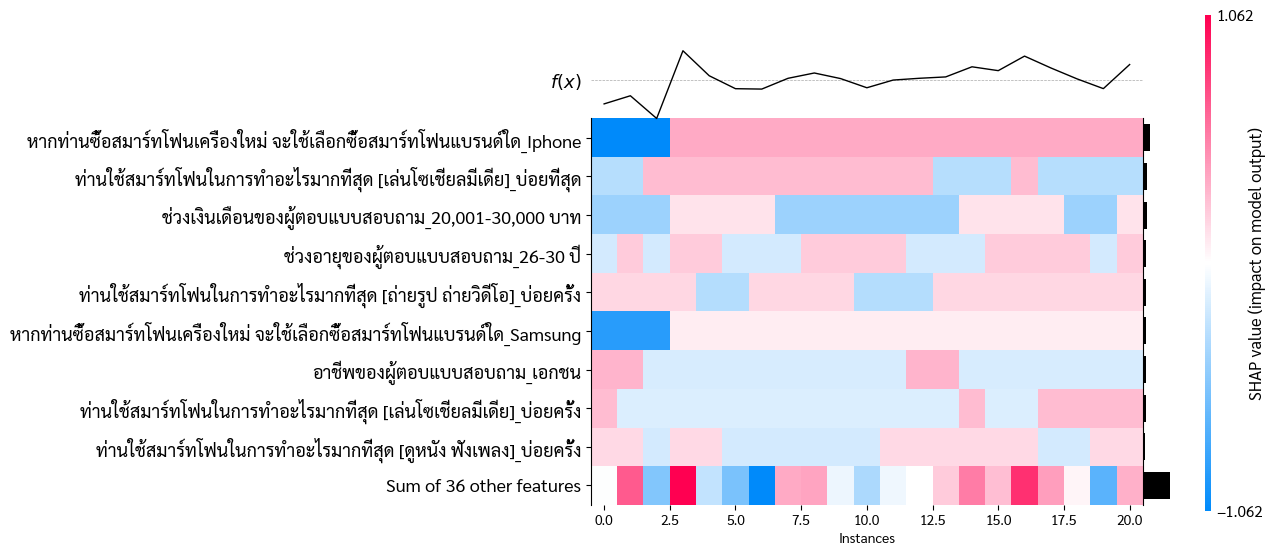

<Axes: xlabel='Instances'>

In [212]:
shap.plots.initjs()
shap.plots.heatmap(shap_values)

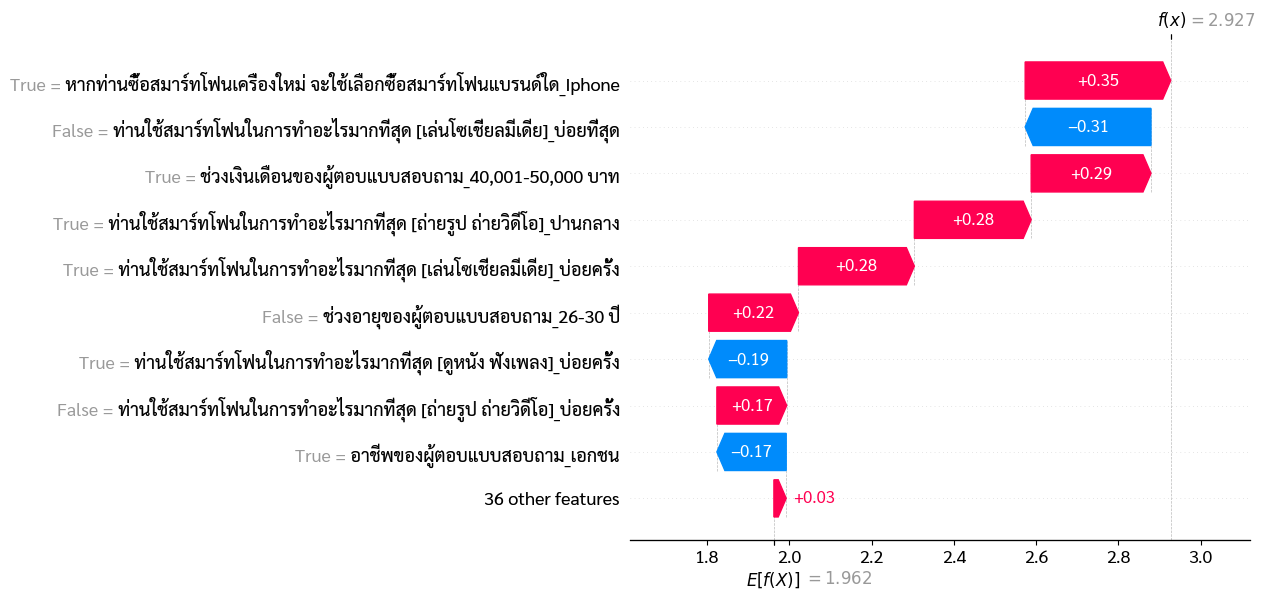

In [214]:
shap.plots.initjs()
shap.plots.waterfall(shap_values[0])

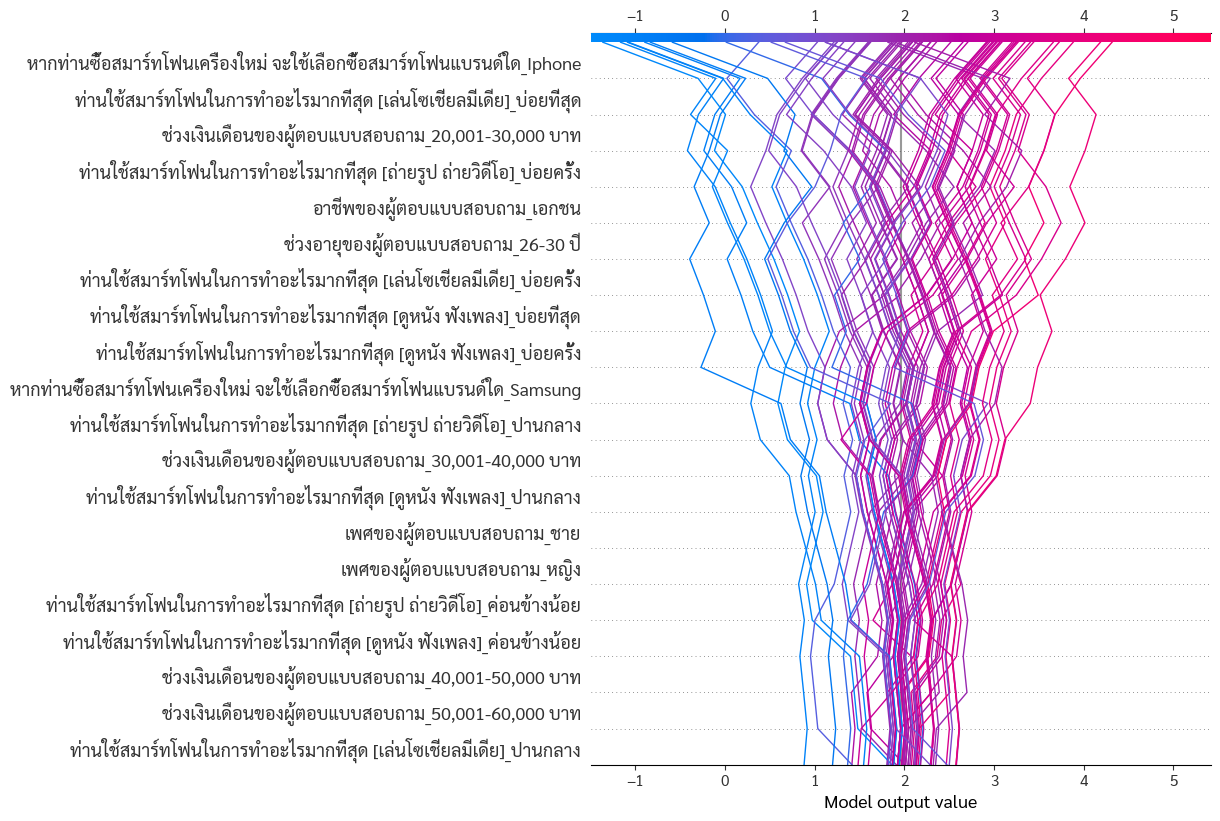

In [221]:
shap.plots.initjs()
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(enc_X),
                   feature_names = list(enc_X.columns))